In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
raw_data = pd.read_csv(url)
print("Data imported successfully")

raw_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


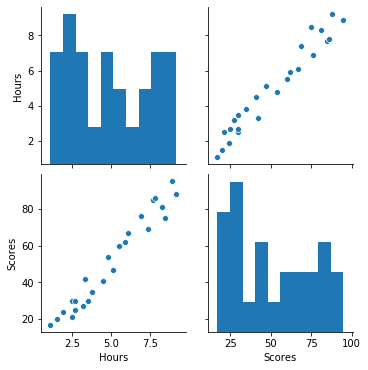

In [4]:
import seaborn as sns
sns.pairplot(raw_data)

In [6]:
raw_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
x=raw_data['Hours']
y=raw_data['Scores']

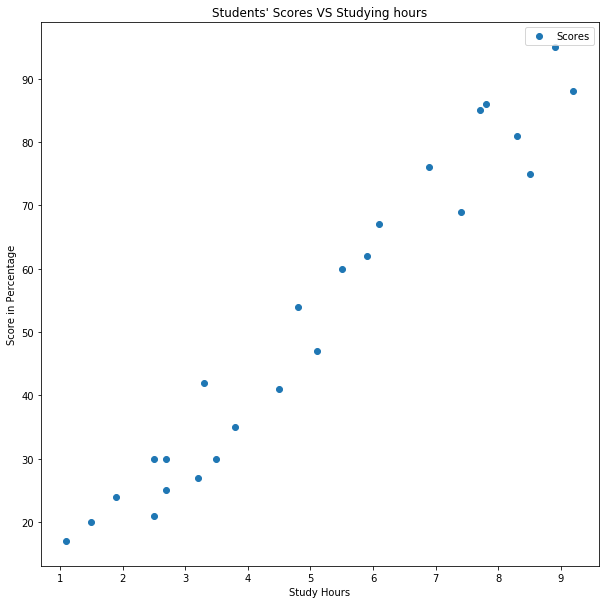

In [8]:
raw_data.plot(x='Hours', y='Scores', style='o',figsize=(10,10))
plt.title("Students' Scores VS Studying hours")
plt.xlabel('Study Hours')
plt.ylabel('Score in Percentage')

plt.show()

In [9]:
X = raw_data.iloc[:, :-1].values  
y = raw_data.iloc[:, 1].values

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training done")

Training done


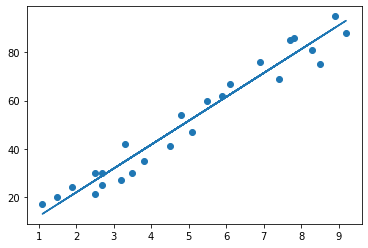

In [12]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()
line = regressor.coef_*X+regressor.intercept_

In [13]:
print(X_test) 
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
hours = 9.25
p=np.array(hours)
p=p.reshape(-1,1)
own_pred = regressor.predict(p)
print("No of Hours = {}".format(p))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [16]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

4.183859899002975

In [17]:
metrics.mean_squared_error(y_test,y_pred)

21.5987693072174